In [55]:
#Import the Libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline


In [56]:
#Load the data
df= sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


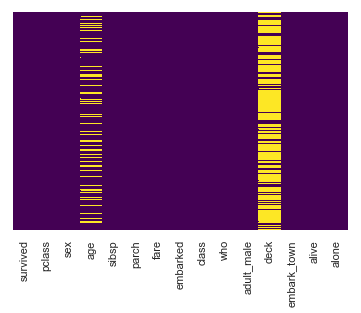

In [57]:
#Visualize the data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

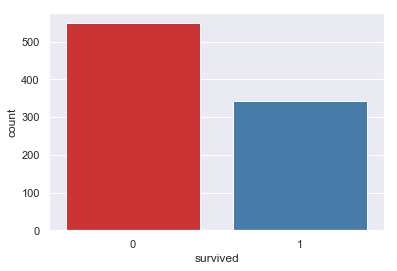

In [58]:
#Exploratory Analysis 0 shows did not survive
sns.set(style="darkgrid")
ax = sns.countplot(x="survived", linewidth = 1, data=df, palette="Set1")

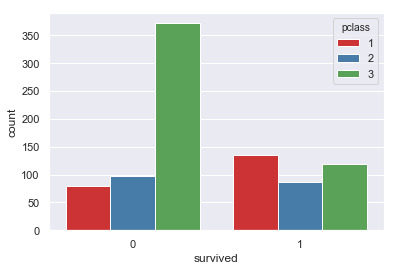

In [59]:
#3 class had the biggest no. of deaths while class 1 survived the most
sns.set(style="darkgrid")
sns.countplot(x ='survived', hue = 'pclass', data = df, linewidth = 1, palette="Set1")

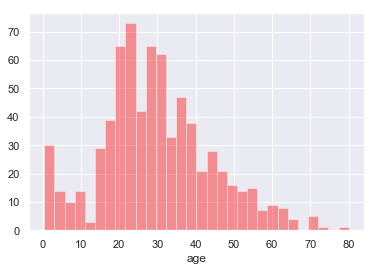

In [60]:
#Most were around the age of 20-40. Jack was 20 years old back then while Rose was 17 year old
sns.set(style="darkgrid")
sns.distplot(df['age'].dropna(), kde = False, bins = 30, color ='Red')

In [61]:
#The age column missing values are imputed using mean of age of different pclass
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass ==1:
            return 37
        elif pclass ==2:
            return 29
        else:
            return 24
    else:
        return age

In [62]:
df['age'] = df[['age', 'pclass']].apply(impute_age, axis =1)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


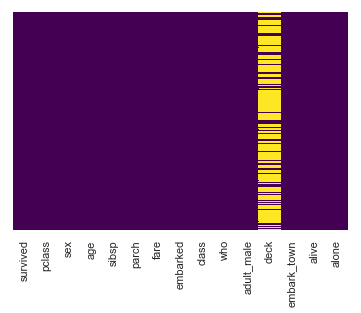

In [63]:
#this shows there are no missing values in age column now
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [64]:
#Most of the columns are repetetive or are of no use for prediction and hence are removed
df.drop(['class','alive','alone','deck','who','adult_male','embark_town'], axis=1, inplace = True)

In [65]:
#Column sex and embarked are encoded
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['sex']=labelencoder.fit_transform(df['sex'].values)
df['embarked']=labelencoder.fit_transform(df['embarked'].astype(str).values)

In [66]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [67]:
#Data is split into train and test data
from sklearn.model_selection import train_test_split
X= df.drop('survived', axis =1)
y = df['survived']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [69]:
#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

C:\Users\vivekt\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vivekt\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\vivekt\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vivekt\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).trans

In [70]:
#After having a clean data, different models are run
def models(X_train, y_train):
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression()
    log.fit(X_train, y_train)
    
    #KNN
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
    knn.fit(X_train, y_train)
    
    #SVM linear model
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state=0)
    svc_lin.fit(X_train, y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
    tree.fit(X_train, y_train)
    
    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(X_train, y_train)
    
    print('[0]Logistic Regression Training Accuracy: ', np.round(log.score(X_train, y_train),3))
    print('[1]KNN Training Accuracy: ', np.round(knn.score(X_train, y_train),3))
    print('[2]Support Vector Training Accuracy: ', np.round(svc_lin.score(X_train, y_train),3))
    print('[3]Decision Tree Training Accuracy: ', np.round(tree.score(X_train, y_train),3))
    print('[4]Random Forest Training Accuracy: ', np.round(forest.score(X_train, y_train),3))
    
    return log, knn, svc_lin, tree, forest

In [71]:
#Train all Models, Decision Tree had the best accuracy of 98.5%
model = models(X_train, y_train)

C:\Users\vivekt\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0]Logistic Regression Training Accuracy:  0.815
[1]KNN Training Accuracy:  0.855
[2]Support Vector Training Accuracy:  0.784
[3]Decision Tree Training Accuracy:  0.982
[4]Random Forest Training Accuracy:  0.963


In [72]:
#Testing Accuracy of Logistic was highest 77.7%
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(X_test))
    TN, FP, FN, TP = cm.ravel()
    score = (TP+TN)/(TN+FP+FN+TP)
    print (cm)
    print('Model[{}] Testing Accuracy = "{}""'.format(i, np.round(score, 3)))

[[97 10]
 [25 47]]
Model[0] Testing Accuracy = "0.804""
[[94 13]
 [24 48]]
Model[1] Testing Accuracy = "0.793""
[[101   6]
 [ 24  48]]
Model[2] Testing Accuracy = "0.832""
[[87 20]
 [29 43]]
Model[3] Testing Accuracy = "0.726""
[[102   5]
 [ 33  39]]
Model[4] Testing Accuracy = "0.788""


In [73]:
#Get Feature Importance
forest = model[4]
importances = pd.DataFrame({'feature': df.iloc[:, 1:10].columns, 'importance': np.round(forest.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances

,importance
feature,
age,0.292
fare,0.279
sex,0.208
pclass,0.085
sibsp,0.057
parch,0.046
embarked,0.033


In [74]:
#pclass, #sex, #age, #Sibsp, #parch, #fare, #embarked
#Jack was class 3 passenger, Male(1), 20 year old, had no sibling(0) or parents(0), he won the tickets (0) in gambling so it was free and he
#embarked from Southamptom (2)

jack_survival = [[3,1,20,0,0,0,2]]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
jack_scaled = sc.fit_transform(jack_survival)


In [75]:
#Prediction of Jack Survival

pred = model[4].predict(jack_scaled)
print(pred)

if pred == 0:
    print ('Jack would have not Survived')
else:
    print("Jack would have Survived")

#He would have not survived even if he had not fallen in love with Rose

[0]
Jack would have not Survived
